<a href="https://colab.research.google.com/github/marinwitherspoon/Image_Description_Application/blob/Marin-Witherspoon/User_interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from transformers import AutoModelForCausalLM
from PIL import Image
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("microsoft/git-base")

loaded_model =  AutoModelForCausalLM.from_pretrained("microsoft/git-base")
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=5e-5)

# Load the saved model and optimizer state
loaded_model.load_state_dict(torch.load(r'/content/drive/MyDrive/Capstone (Shared)/8k_finetuned_model/finetuned_model_grad', map_location=torch.device('cpu')))
loaded_optimizer.load_state_dict(torch.load(r'/content/drive/MyDrive/Capstone (Shared)/8k_finetuned_model/optimizer_state_grad', map_location=torch.device('cpu')))

# Set the model to evaluation mode for inference
loaded_model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

In [4]:
#user input of file path to image
image_path = input('image file path here: ')
#/content/drive/MyDrive/Capstone (Shared)/User input/portrait-photographer-background-people-public-event-56561794.jpg

image file path here: /content/drive/MyDrive/Capstone (Shared)/User input/portrait-photographer-background-people-public-event-56561794.jpg


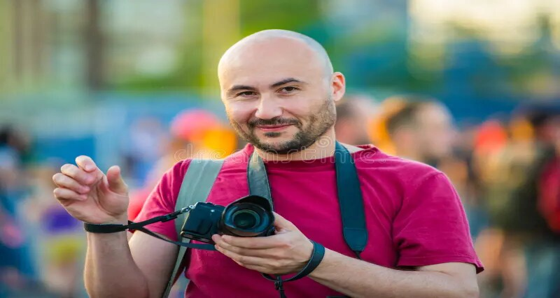

a bald man in a red shirt is holding a camera and posing for a picture


In [5]:
image = Image.open(image_path)
width, height = image.size
display(image.resize((int(0.7*width), int(0.5*height))))

device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)